In [1]:
import sys
sys.path.append("../../..")

from FIDOM.NonHydrostatic.ModelSettings import ModelSettings
from FIDOM.NonHydrostatic.Grid import Grid
from FIDOM.NonHydrostatic.State import State
from FIDOM.NonHydrostatic.Projection import GeostrophicSpectral
from FIDOM.NonHydrostatic.Model import Model
from FIDOM.NonHydrostatic.Plot import Plot
from FIDOM.NonHydrostatic.ModelPlotter import ModelPlotter

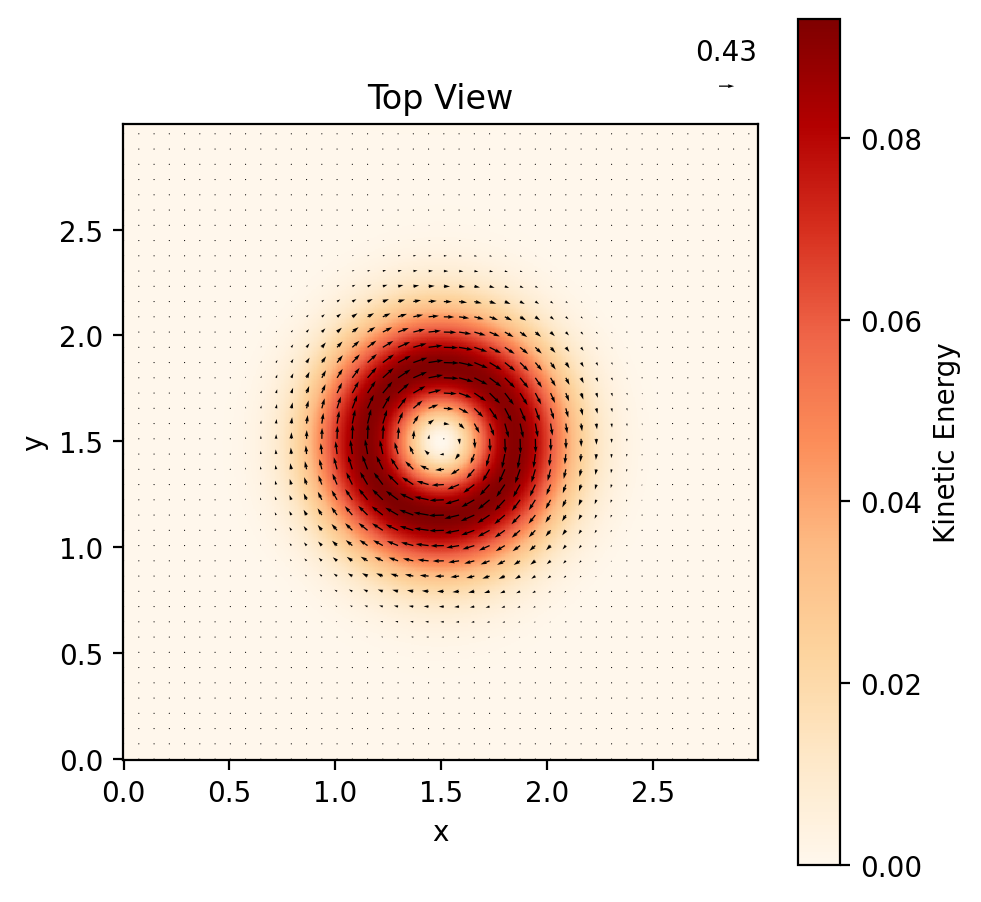

In [2]:
class MyPlotter(ModelPlotter):
    def update_figure(fig, z, p, time, **kwargs):
        Plot(z.ekin()).top(z, fig=fig, cmax=0.08, vmax=0.5)
        fig.gca().set_title(f"Top View,   t = {time:.3f}")

mset = ModelSettings(L=[3, 3, 0.02], N=[500, 500, 2], dt=0.01, beta=0.2, f0=0.7)
mset.enable_varying_f = True
mset.enable_nonlinear = False
mset.periodic_bounds[1] = False
mset.enable_vid_anim = True
mset.vid_plotter = MyPlotter
mset.vid_anim_interval = 75
mset.vid_anim_filename = "rossby_waves.mp4"

grid = Grid(mset)
cp = grid.cp

z = State(mset, grid)
X, Y, Z = tuple(grid.X)
z.u[:] = 2*(Y-1.5) * cp.exp(-((X-1.5)**2 + (Y-1.5)**2)/0.5**2)
z.v[:] = -2*(X-1.5) * cp.exp(-((X-1.5)**2 + (Y-1.5)**2)/0.5**2)

z = GeostrophicSpectral(mset, grid)(z)
Plot(z.ekin()).top(z)

In [3]:
model = Model(mset, grid)
model.z = z
model.run(runlen=100)
model.show_video()

  0%|          | 44/10000 [00:00<01:01, 161.57it/s]

100%|██████████| 10000/10000 [01:10<00:00, 142.13it/s]
